C:\Users\raaja\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


'Pug'

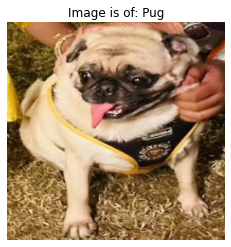

In [4]:
from pathlib import Path
import torch
from torch.utils.data import DataLoader
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"

def classify_event(image):
    '''
    ADD YOUR CODE HERE
    '''
    
    test_data = datasets.ImageFolder(root="dataset/test")

    class_names = test_data.classes

    path = "models/model.pth"
    model = torch.load(path)
    model.to(device)

    data_image = torchvision.io.read_image(str(image)).type(torch.float32)
    data_image /= 255

    IMG_SIZE = (256, 256)

    data_transform = transforms.Compose([
    transforms.Resize(size=IMG_SIZE),
    ])

    data_image_transformed = data_transform(data_image)

    model.eval()
    with torch.inference_mode():
        # Add an extra dimension to image
        data_image_transformed_with_batch_size = data_image_transformed.unsqueeze(dim=0)
       
        # Make a prediction on image with an extra dimension
        data_image_pred = model(data_image_transformed.unsqueeze(dim=0).to(device))

    data_image_pred_label = torch.argmax(data_image_pred, dim=1)

    data_image_pred_class = class_names[data_image_pred_label.cpu()]

    event = data_image_pred_class

    plt.imshow(data_image_transformed.permute(1, 2, 0)) # need to permute image dimensions from CHW -> HWC otherwise matplotlib will error
    plt.title(f"Image is of: {event}")
    plt.axis(False)

    return event

name = "1"
classify_event(f'''test/custom/{name}.jpg''')